
# Modelo Preditivo para Identificação de Fraudes <br> em Transações de Crédito  
####  Nome: Ozeas dos Santos Nascimento - Cientista de Dados

==================================

Neste projeto, estarei aplicando técnicas de Machine Learning fazendo uso de modelos supervisionados a fim de classificar futuras transações como normais ou fraudulentas; A aplicação deste modelo se torna importante pois uma vez que a operação esteja classificada como fraudulenta, poderá ser bloqueada, impedindo prejuízos tanto ao E-commerce quanto aos seus demais clientes.


### INFORMAÇÕES BASE DE DADOS <br> 
||| Time = Tempo das transações. <br>
||| Amount = Valor da transação. <br>
||| V1, V2, ... V28 = Resultados de uma transformação PCA (Realizada pelo fornecedor do dataset, devido a questões de confidencialidade dos dados considerados sensiveis).<br>
||| Class = Classificação dos dados 1 fraude, 0 Normal.<br>


===========================

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Modelo de regressão logística

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score #Essa função qualifica nossas métricas de desempenho e cálculos de distância.
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from matplotlib import pyplot

from imblearn.under_sampling import RandomUnderSampler # Importando o RandomUnderSampler do imblearn
from imblearn.over_sampling import RandomOverSampler # Importando o RandomOverSampler do imblearn

from sklearn.metrics import f1_score
from sklearn.metrics import auc

## ANÁLISE EXPLORATÓRIA / / Distribuição dos dados

### Carregamento dos Dados

Estaremos realizando o carregamento dos dados baixados através do portal Kaggle (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).<br>
O conjunto de dados contém transações realizadas com cartões de crédito durante o período de 2 dias, em setembro de 2013, por titulares de cartões europeus.<br>
Utilizaremos os dados carregados em nosso dataframe, denominado como <b>"df_creditcard" </b>.

In [2]:
df_creditcard = pd.read_csv("creditcard.csv")
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_creditcard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


#### Estrutura dos dados
É importante conhecer a estrutura dos dados contidos no dataset para a realização de uma boa analise, por isto, <br>
com a utilização do comando <b>df_creditcard.info()</b>, podemos obter informações relevantes sobre a estrutura e como os dados carregados estão em nosso dataframe. <br><br> Após a utilização do comando, observamos que o dataset contém: 284807 registros em todas as suas 31 colunas, não possuindo valores null / nan. As colunas são: Time, V1, V2,...,V28, Amount e Class. <br> Todos os atributos foram reconhecidos automaticamente pelo Pandas e não apresentam atributos com o tipo 'object' (que poderia indicar a presença de strings) ou 'category' (tipo especial do pandas), ou qualquer outro tipo de erro durante a leitura de nossos dados. <br> As colunas contem variáveis ​​de entrada numéricas que são o resultado de uma transformação PCA, com excessão das colunas Time, Amount e Class. <br> Destas, 30 colunas possuem o Dtype Float, e apenas 1 (Class) com o Dtype int64. <br> 


 O dataset ocupa 67.4Mb de memória.<br>



In [4]:
df_creditcard.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Confirmado a inexistência de dados faltantes e nulos, em cada atributo.

In [5]:
df_creditcard.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Registros Duplicados
Também foi verificado a existência de 1081 itens duplicados em nosso database, que serão excluídos na etapa de tratamento dos dados.

In [6]:
#Verificação de registros duplicados:
df_creditcard.duplicated().sum()

1081

Os dados possuem classificação binária: 1 e 0; onde 1 classifica a transação como fraude, e 0 como normal.

In [7]:
print('Os dados estão classicados em',df_creditcard.Class.nunique(),'categorias: ', df_creditcard.Class.unique())

Os dados estão classicados em 2 categorias:  [0 1]


# Distribuição dos dados

Tendo como base o atributo class, continuaremos a nossa exploração, analisando dados classificados como normais ou fraude.

Class

In [8]:
#Tamanho da Base e da Classe. 0: Normal , 1: Fraude
print(f'Tamanho total da base: {df_creditcard.shape[0]}, sendo a Classe:')
print(df_creditcard['Class'].value_counts())

Tamanho total da base: 284807, sendo a Classe:
0    284315
1       492
Name: Class, dtype: int64


Podemos observar que nossa base de dados está desbalanceada, pois, menos de 1% dos dados (0.17%) estão classificados como fraudes.

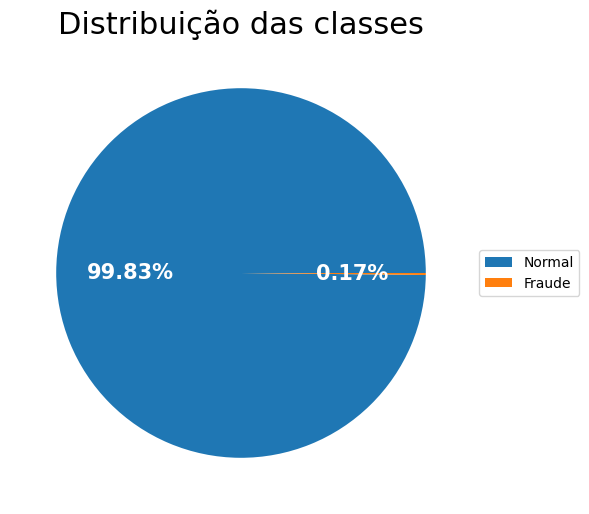


 As operações Normais representam 99.8273% das transações, enquanto que as operações fraudulentas apenas 0.1727%.


In [9]:
# Distribuição das Classes. Menos de 1% das operações foram classificadas como fraude

df_tipo_operacao = df_creditcard['Class'].value_counts()
fig,ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect='equal'))
dados_op = df_tipo_operacao.values
legenda_op = df_tipo_operacao.index
wedges,texts,autotexts = ax.pie(dados_op, autopct='%0.2f%%',textprops=dict(color='w'))

ax.legend(wedges,['Normal','Fraude'],
          loc='center left',
          fontsize=10,
          bbox_to_anchor=(1,0,0.5,1))

plt.setp(autotexts, size=15,weight='bold')
ax.set_title('Distribuição das classes', fontsize=22)

cinza_claro = "#CFCDCE"
cinza_medio = "#A2A1A3"
cinza_escuro = "#787878"
azul_claro = "#8db7eb"
azul_escuro = "#253760"

x_text_antes = 0.1
plt.show()

print("\n As operações Normais representam {:.4f}% das transações,".format((df_creditcard[df_creditcard['Class'] == 0].shape[0] / df_creditcard.shape[0]) * 100), 'enquanto que as operações fraudulentas apenas {:.4f}%.'.format((df_creditcard[df_creditcard['Class'] == 1].shape[0] / df_creditcard.shape[0]) * 100))


Abaixo podemos observar o 'tamanho' desta diferença.

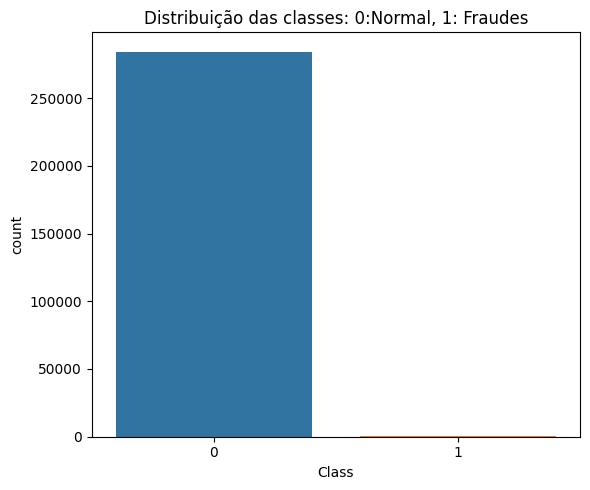

In [10]:
plt.rcParams['figure.figsize'] = [6,5]
sns.countplot(x='Class', data = df_creditcard)
plt.title('Distribuição das classes: 0:Normal, 1: Fraudes')
plt.tight_layout()

### Tempo (Time)

Observamos também a distribuição na coluna Time, que representa o tempo entre as transações. Aparentemente, nenhuma anormalidade foi encontrada.


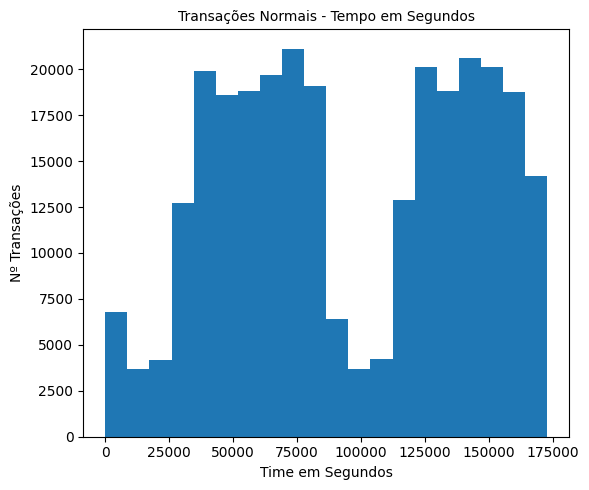

In [11]:
plt.hist(df_creditcard.Time[df_creditcard.Class == 0], bins=20)
plt.title('Transações Normais - Tempo em Segundos', fontsize=10)
plt.ylabel('Nº Transações')
plt.xlabel('Time em Segundos')
plt.tight_layout()

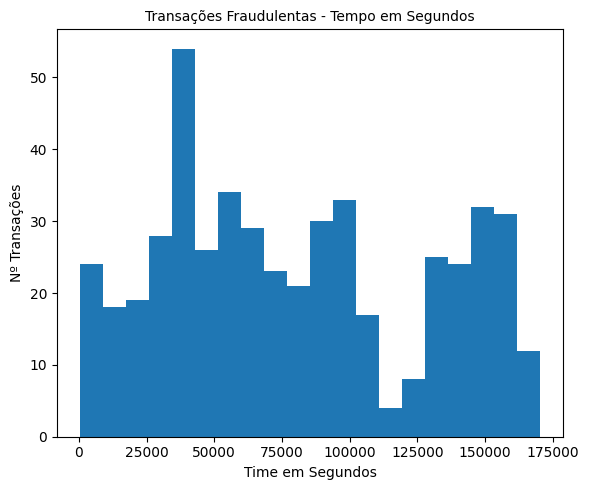

In [12]:
plt.hist(df_creditcard.Time[df_creditcard.Class == 1], bins=20)
plt.title('Transações Fraudulentas - Tempo em Segundos', fontsize=10)
plt.ylabel('Nº Transações')
plt.xlabel('Time em Segundos')
plt.tight_layout()

### Amount
Verificaremos também como está a distribuição dos Valores (amount)

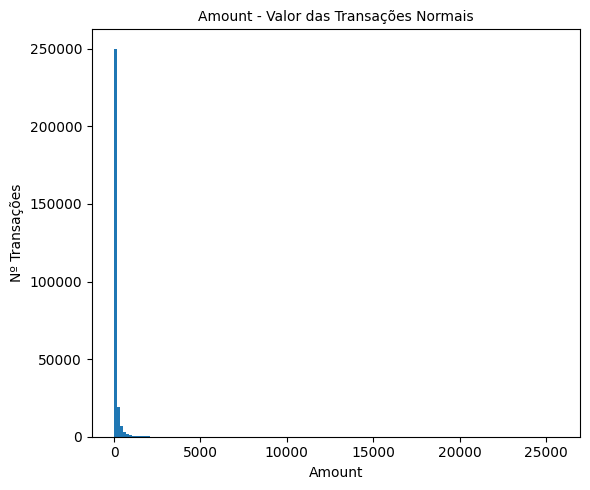

In [13]:
plt.hist(df_creditcard.Amount[df_creditcard.Class == 0], bins=150)
plt.title('Amount - Valor das Transações Normais', fontsize=10)
plt.ylabel('Nº Transações')
plt.xlabel('Amount')
plt.tight_layout()

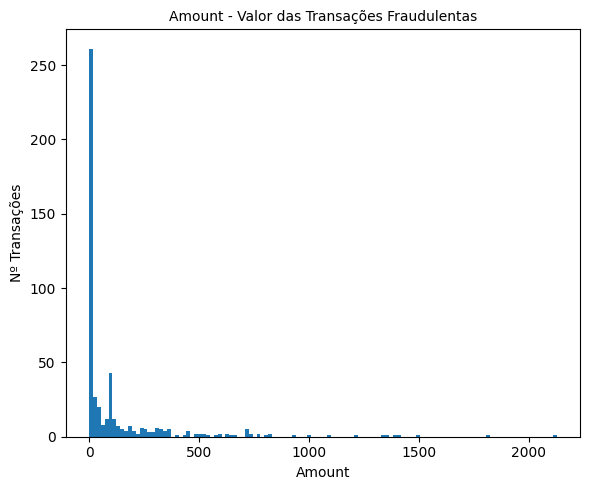

In [14]:
plt.hist(df_creditcard.Amount[df_creditcard.Class == 1], bins=120)
plt.title('Amount - Valor das Transações Fraudulentas', fontsize=10)
plt.ylabel('Nº Transações')
plt.xlabel('Amount')
plt.tight_layout()

## Estatistica Descritiva dos Dados

A estatística descritiva, possui o objetivo de sintetizar uma série de valores de mesma natureza, permitindo uma visão global da variação desses valores, organizando e descrevendo os dados por meio de tabelas, de gráficos e de medidas descritivas.


Ao recebemos os dados, estamos sujeitos a encontrar diversos problemas, entre eles a inconsistências nos dados causados por:<br>
Erros de sistema,<br> 
Erros no próprio dados por inputs manuais (Erro humano), e <br> 
Erros por Sistema legado (Perda de dados, e/ou input de inconsistencias durante uma possível migração de arquitetura).<br>
<br>
Tendo em vista todas estas possibilidades, torna-se importante fazer uso da estatistica descritiva, afim de identificar possíveis discrepancias nos dados e  saberemos também se os dados estão fazendo sentido para nossa analise.



Estatisticamente, há pouca diferença entre o tempo (em segundos) entre as transações normais e fraudulentas.
Foi possível observar que esta diferença é ainda menor entre a STD, valor Mínimo e valor Máximo. Ou seja, o tempo entre as operações é praticamente o mesmo. <br> 
Verificaremos também, como estão distribuidos os VALORES em relação as operações fraudulentas e normais




In [15]:
#Analise estatistica Geral
df_creditcard[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_creditcard['Time'][df_creditcard['Class']==0].describe().index, \
                         y=df_creditcard['Time'][df_creditcard['Class']==0].describe(), mode = 'markers+lines', name="Normais"))

fig.add_trace(go.Scatter(x=df_creditcard['Time'][df_creditcard['Class']==1].describe().index, \
                         y=df_creditcard['Time'][df_creditcard['Class']==1].describe(), mode = 'markers+lines', name="Fraudes"))

fig.update_layout(title_text ='Análise Estatística Tempo Entre as Transações Normais e Fraudulentas', title_font_size=20)

### Analise Estatistica Transações Normais

In [17]:
df_creditcard['Amount'][df_creditcard['Class']==0].describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [22]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_creditcard['Amount'][df_creditcard['Class']==0].describe().index, \
                         y=df_creditcard['Amount'][df_creditcard['Class']==0].describe(), mode = 'markers+lines', name="markers+line"))

fig.update_layout(title_text ='Análise Estatística - Amount  Transações Normais', title_font_size=20)

### Analise Estatistica Transações Fraudulentas

In [ ]:
#Analise estatistica Transações Fraudulentas
df_creditcard['Amount'][df_creditcard['Class']==1].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_creditcard['Amount'][df_creditcard['Class']==1].describe().index, \
                         y=df_creditcard['Amount'][df_creditcard['Class']==1].describe(), mode = 'markers+lines', name="markers+line"))
fig.update_layout(title_text ='Análise Estatística - Amount Transações Fraudulentas', title_font_size=20)

## Analise de outliers

Com o comando relplot abaixo, podemos observar como os dados estão distribuidos entre as colunas Amount, Time e Class.<br>
Claramente é possível identificar a presença de outliers. Estes não serão removidos, pois o valor mesmo sendo um outlier poderia ser fruto de uma transação fraudulenta.

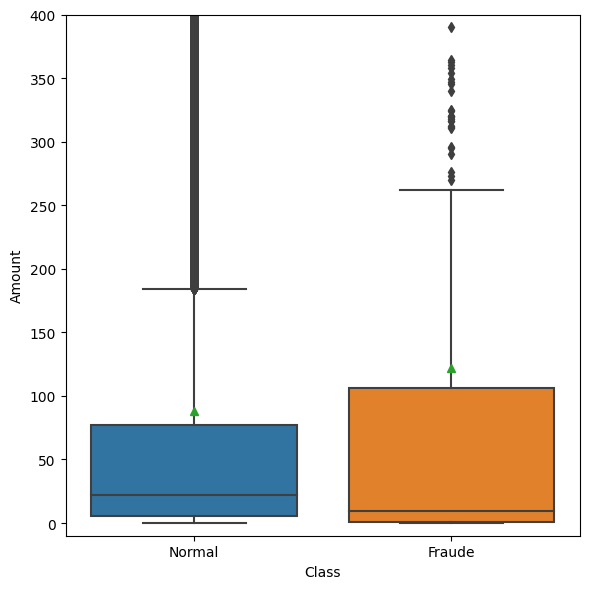

In [ ]:
plt.subplots(figsize=(6,6), sharex=True)
sns.boxplot(x='Class', y= 'Amount', data =df_creditcard, showmeans=True)
plt.ylim((-10, 400))
plt.xticks([0, 1],['Normal', 'Fraude'])
plt.tight_layout()

### Analise Bivariada;
Uma duvida que tivemos é se existe uma relação entre causa e efeito entre as duas variáveis numéricas "Time" e "Amount". Não significando que uma é a causa da outra, mas gostariamos de verificar se existe alguma relação e qual poderia ser a sua intensidade (Positiva, Negativa, Neutra ou Não Linear). <br>  <br> Ao gerar os graficos abaixo, podemos identificar que existe uma relação neutra nos 2 tipos de operação, além de facil visualização dos outlies (pontos extremos) e os grupos de dados. Pode-se observar que não há presença de outliers na variável "Time" de ambas as transações, mas as encontramos nas variaveis 'Amount'.

Nas transações normais, a maioria das operações estão agrupados com valores variando entre 0 à 5000 dolares, e com intervalos de tempo entre 0 e 175000 segundos, porém, com acentuada redução de valores em aproximadamente 100000 segundos. Os outliers podem chegar a 25000 dolares.

Quanto as transações fraudulentas, a maioria das operações estão agrupados com valores variando entre 0 à aproximadamente 250 dolares com intervalos de tempo variando entre 0 e 175000 segundos, e o outlies passam de 2000 dolares.

In [ ]:
normal = df_creditcard.loc[df_creditcard['Class']==0]
fraude = df_creditcard.loc[df_creditcard['Class']==1]

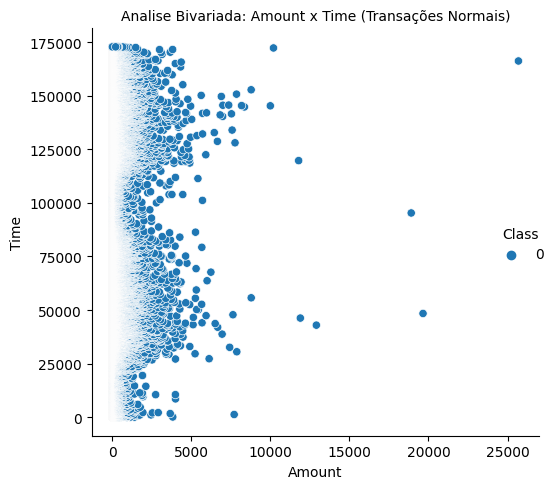

In [ ]:
sns.relplot(x='Amount', y='Time', hue = 'Class', data =normal)
plt.title('Analise Bivariada: Amount x Time (Transações Normais)', fontsize=10)
plt.tight_layout()

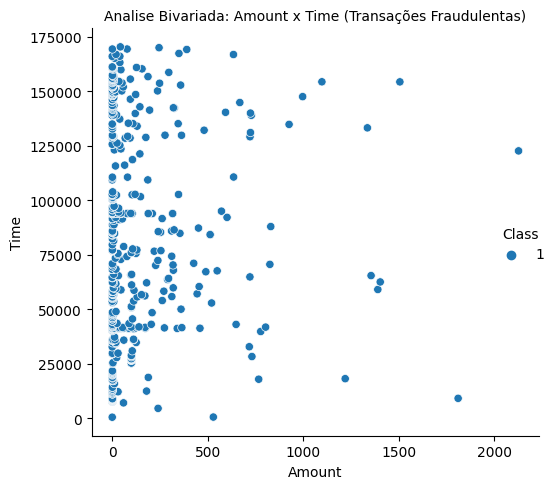

In [ ]:
sns.relplot(x='Amount', y='Time', hue = 'Class', color = 'orange', data =fraude)
plt.title('Analise Bivariada: Amount x Time (Transações Fraudulentas)', fontsize=10)
plt.tight_layout()

# Preparação dos Dados

### Limpeza dos dados

Nesta etapa, realizaremos a limpeza dos dados, pois embora nossos dados não possua valores null/nan, percebemos que existem 1081 registros duplicados.<br>
Com a celula abaixo, removeremos os itens duplicados de nosso dataframe


In [ ]:
print('Total de registros: ',df_creditcard.shape[0], '\nTotal de registros duplicados: ',df_creditcard.duplicated().sum())
df_creditcard = df_creditcard.drop_duplicates()
print('Total de registros após remover duplicados: ',df_creditcard.shape[0])

Total de registros:  284807 
Total de registros duplicados:  1081
Total de registros após remover duplicados:  283726


# Padronização Colunas Time e Amount

Devido a existência de outliers em varias colunas, estaremos realizando a padronização dos dados.

### Verificação se as colunas seguem o modelo Gaussiano:

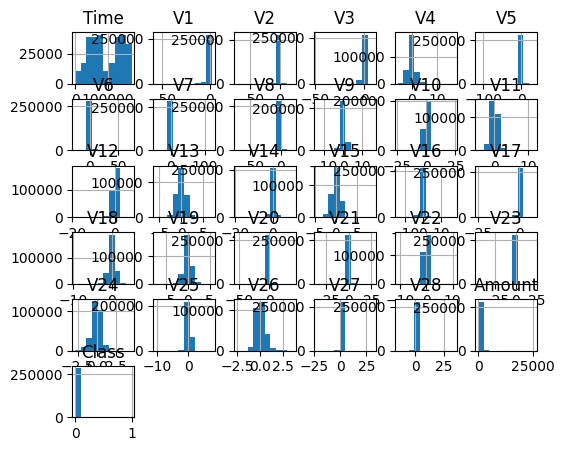

In [ ]:
df_creditcard.hist()
plt.show()


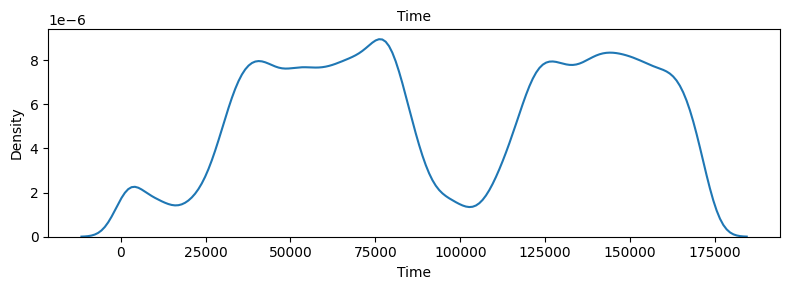

In [ ]:
# Time
fig = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
sns.kdeplot(df_creditcard['Time'], label="Class 0", y=None, shade=None, common_norm = True)
plt.title('Time', fontsize=10)

plt.tight_layout()

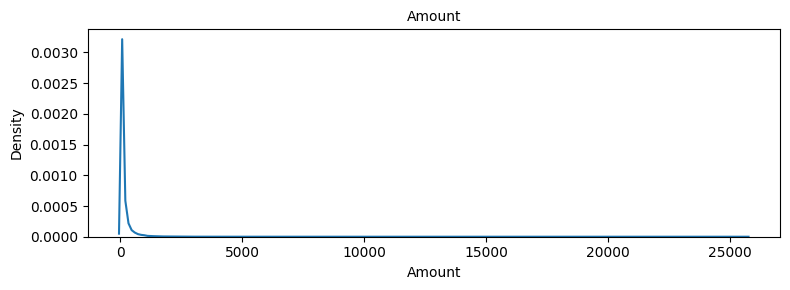

In [ ]:
# Amount
fig = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
sns.kdeplot(df_creditcard['Amount'], label="Class 0", y=None, shade=None, common_norm = True)
plt.title('Amount', fontsize=10)

plt.tight_layout()

### Aplicação Normalização - MinMaxScaler()

In [ ]:
col_df = df_creditcard.columns
col = []
for i in col_df:
    col.append(i)


In [ ]:
mms = MinMaxScaler()
df_creditcard_norm = df_creditcard.copy()

df_creditcard_norm = mms.fit_transform(df_creditcard_norm.iloc[:,0:(df_creditcard_norm.shape[1])])
df_creditcard_norm = pd.DataFrame(df_creditcard_norm)
df_creditcard_norm.columns=col
df_creditcard_norm

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0.0
283722,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,...,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0.0
283723,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,...,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0.0
283724,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0.0


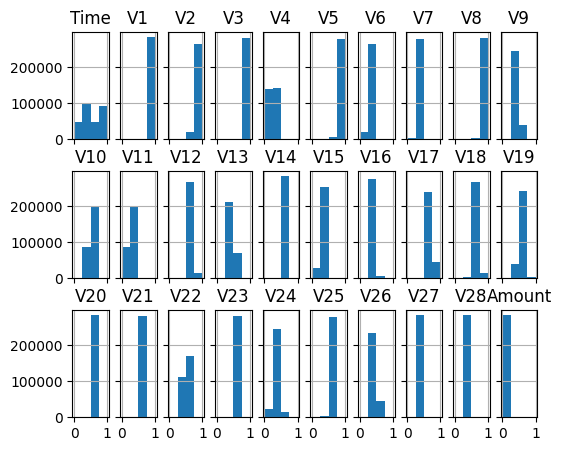

In [ ]:
fig, ax = plt.subplots(3,10, sharex='col', sharey='row')

m=0
for i in range(3):
    for j in range(10):

        df_creditcard_norm.hist(column = df_creditcard_norm.columns[m], bins = 4, ax=ax[i,j], figsize=(610, 80))
        m+=1

### Dividir em treino e teste
#### Criação do modelo / Particionamento dos dados em 30% de teste

Durante a divisão dos dados, resolvemos separar 30% dos dados para teste, e 70% para treino. Para diminuirmos o viés durante a divisão, utilizamos o parametro 'stratify' para que a mesma proporsão de X separado para teste, seja a mesma proporsão de y. O parametro 'shuffle' também foi acrescentado, para que possa separar os dados de forma randomica em suas respectivas colunas. Com este procedimento, não estaremos tornando os dados conhecidos em nossa maquina preditiva.

In [ ]:
# Particiona a base de dados
X = df_creditcard_norm.iloc[:,0:(df_creditcard_norm.shape[1] - 1)] 
y = df_creditcard_norm.iloc[:,(df_creditcard_norm.shape[1] - 1)]
#Treinamento = 70% e teste = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=100, test_size=0.3)


# Machine Learning
### Previsões com dados DESBALANCEADOS

#### Regressão Logistica

In [ ]:
clf = LogisticRegression(random_state=55,max_iter=1000) # Definindo o nosso classificador
clf = clf.fit(X_train,y_train) # Fit dos dados
y_pred = clf.predict(X_test) # Previsão (base de teste)
clf

LogisticRegression(max_iter=1000, random_state=55)

##### Matriz de Confusão
Segundo a nossa matrix de confusão, 84935 registros previstos, acertadamente foram classificados como normal, e 14 operações erroneamente prevista como fraude.
em nosso teste, 72 operações foram previstas erroneamente como normal, e 70 operações foram corretamente classificados como fraudulentas.

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Normal", "Fraude"], columns=["Normal (prev)", "Fraude (prev)"])
print(cnf_table)

        Normal (prev)  Fraude (prev)
Normal          84962             14
Fraude             72             70


Sabemos que não é correto a utilização da acuracia como melhor métrica para a nossa analise devido ao desbalanceamento dos dados. Por isto, estaremos considerando o recall como melhor métrica a ser considerada em nossa analise.

In [ ]:
# Avaliando a acurácia do modelo
accuracy_score(y_test,y_pred)

0.9989896379144246

Recall de 49%!

In [ ]:
print(classification_report(y_test, y_pred, target_names=["Normal", "Fraude"]))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     84976
      Fraude       0.83      0.49      0.62       142

    accuracy                           1.00     85118
   macro avg       0.92      0.75      0.81     85118
weighted avg       1.00      1.00      1.00     85118



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.978


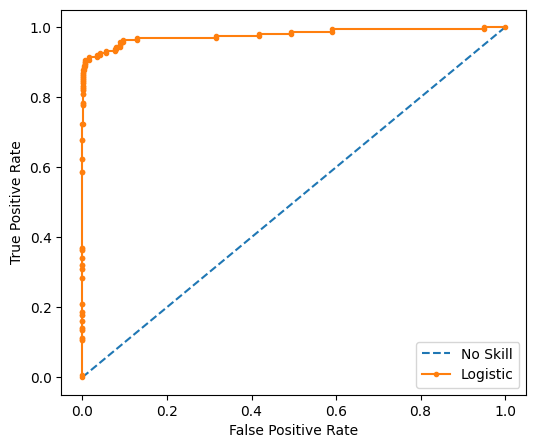

In [ ]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X_train, y_train, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

============================

# BALANCEAMENTO DOS DADOS

Conforme abordado no inicio da nossa analise, os dados estão desbalanceados, possuindo 99,83% dos dados classificados como transações normais e menos que 1% (0.17%) dos dados classificados como fraude.

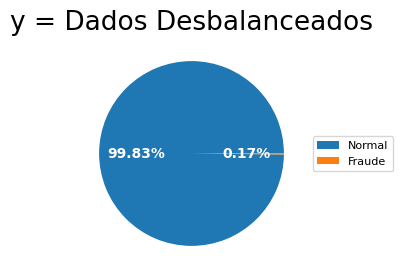

Operações normais:  283253
Operações fraudulentas:  473


In [ ]:
# Distribuição das Classes. Menos de 1% das operações foram classificadas como fraude

df_tipo_operacao = y.value_counts()
fig,ax = plt.subplots(figsize=(3,3), subplot_kw=dict(aspect='equal'))
dados_op = df_tipo_operacao.values
legenda_op = df_tipo_operacao.index
wedges,texts,autotexts = ax.pie(dados_op, autopct='%0.2f%%',textprops=dict(color='w'))

ax.legend(wedges,['Normal','Fraude'],
          loc='center left',
          fontsize=8,
          bbox_to_anchor=(1,0,0.5,1))

plt.setp(autotexts, size=10,weight='bold')
ax.set_title('y = Dados Desbalanceados', fontsize=19)
plt.show()
print('Operações normais: ',y.value_counts()[0])
print('Operações fraudulentas: ',y.value_counts()[1])

Ao utilizarmos os dados desbalanceados, estaremos obtendo um resultado não condizente com a realidade, devido ao viés criado pela classe majoritária, que possui a maioria dos dados (99% = 283253) classificados como normal, enquanto que a classe minoritária possui menos que 1% (473), conforme demonstrado no grafico acima. Para resolver este problema, torna-se necessário o balanceamento dos dados.

Por isto, para balancear o dataset, podemos utilizar 2 tecnicas: undersampler, que reduz os registros da classe majoritária (que possui mais registros) ou oversampler, que aumenta os registros da classe minoritária (que possui menos registros).

## RandomUnderSampler

In [ ]:
# Definindo o RandomUnderSampler
rus = RandomUnderSampler(random_state=55)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [ ]:
# Contando a quantidade de registros na base de treino
y_train.value_counts()

0.0    198277
1.0       331
Name: Class, dtype: int64

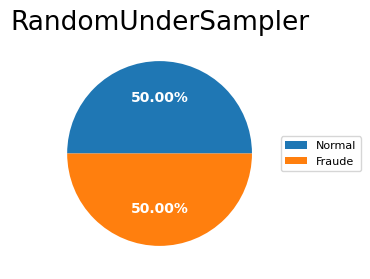

Operações normais:  331
Operações fraudulentas:  331


In [ ]:
df_tipo_operacao = y_res.value_counts()
fig,ax = plt.subplots(figsize=(3,3), subplot_kw=dict(aspect='equal'))
dados_op = df_tipo_operacao.values
legenda_op = df_tipo_operacao.index
wedges,texts,autotexts = ax.pie(dados_op, autopct='%0.2f%%',textprops=dict(color='w'))

ax.legend(wedges,['Normal','Fraude'],
          loc='center left',
          fontsize=8,
          bbox_to_anchor=(1,0,0.5,1))

plt.setp(autotexts, size=10,weight='bold')
ax.set_title('RandomUnderSampler', fontsize=19)
plt.show()
print('Operações normais: ',y_res.value_counts()[0])
print('Operações fraudulentas: ',y_res.value_counts()[1])


### Regressão logistica
<p> -Com RandomUnderSampler

In [ ]:
# Podemos usar novamente a Regressão Logística e verificar o resultado
clf2 = LogisticRegression(random_state=55,max_iter=500)
clf2 = clf2.fit(X_res, y_res)
y_pred2 = clf2.predict(X_test)

#### Matriz de Confusão

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred2)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Normal", "Fraude"], columns=["Normal (prev)", "Fraude (prev)"])
print(cnf_table)

        Normal (prev)  Fraude (prev)
Normal          84826            150
Fraude             29            113


Ao utilizar nossa matrix de confusão, podemos identificar que temos um recall mais alto (80%) que o anterior(49%), porém temos a curva Roc menor (ROC AUC=0.967).

In [ ]:
print(classification_report(y_test, y_pred2, target_names=["Normal", "Fraude"]))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     84976
      Fraude       0.43      0.80      0.56       142

    accuracy                           1.00     85118
   macro avg       0.71      0.90      0.78     85118
weighted avg       1.00      1.00      1.00     85118



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.967


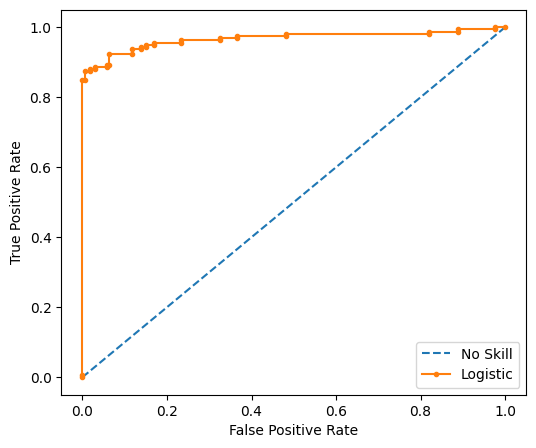

In [ ]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X_res, y_res, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## RamsomOverSampler

In [ ]:
# Aplicando RamdomOverSampler
ros = RandomOverSampler(random_state=55)
X_resROS, y_resROS = ros.fit_resample(X_train, y_train)

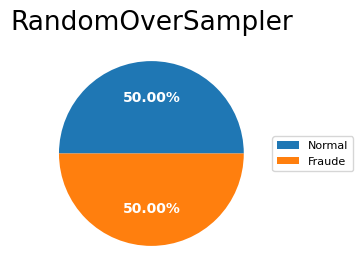

Operações normais:  198277
Operações fraudulentas:  198277


In [ ]:
df_tipo_operacao = y_resROS.value_counts()
fig,ax = plt.subplots(figsize=(3,3), subplot_kw=dict(aspect='equal'))
dados_op = df_tipo_operacao.values
legenda_op = df_tipo_operacao.index
wedges,texts,autotexts = ax.pie(dados_op, autopct='%0.2f%%',textprops=dict(color='w'))

ax.legend(wedges,['Normal','Fraude'],
          loc='center left',
          fontsize=8,
          bbox_to_anchor=(1,0,0.5,1))

plt.setp(autotexts, size=10,weight='bold')
ax.set_title('RandomOverSampler', fontsize=19)
plt.show()
print('Operações normais: ',y_resROS.value_counts()[0])
print('Operações fraudulentas: ',y_resROS.value_counts()[1])


### Regressão Logistica
-Com Oversampling

In [ ]:
clf2 = LogisticRegression(random_state=55,max_iter=500)
clf2 = clf2.fit(X_resROS,y_resROS)
y_pred3 = clf2.predict(X_test)

### Matrix Confusão

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred3)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Normal", "Fraude"], columns=["Normal (prev)", "Fraude (prev)"])
print(cnf_table)

        Normal (prev)  Fraude (prev)
Normal          83280           1696
Fraude             14            128


Oversampling apresentou maior recall (90), mesmo com a menor precisão(0.07)

In [ ]:
print(classification_report(y_test, y_pred3, target_names=["Normal", "Fraude"]))

              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99     84976
      Fraude       0.07      0.90      0.13       142

    accuracy                           0.98     85118
   macro avg       0.54      0.94      0.56     85118
weighted avg       1.00      0.98      0.99     85118



O modelo Oversample, além de apresentar melhor recall (0.90%), também possui a melhor curva Roc:<br>
Logistic: ROC AUC=0.986 <br>
<br>
Com a curva ROC, visualizaremos a sensibilidade, demonstrando a probabilidade de uma transação normal ser corretamente classificada pelo teste.<br>
E também a especificidade, que é a probabilidade de uma transação fraudulenta ser corretamente classificada como fraudulenta no teste.<br>
Quanto maior for o valor da nossa curva, melhor será a utilizaçao do modelo 

Com base nos valores obtidos, o modelo Oversample apresentou o moelhor resultado, tanto em Recall quanto a curva

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.986


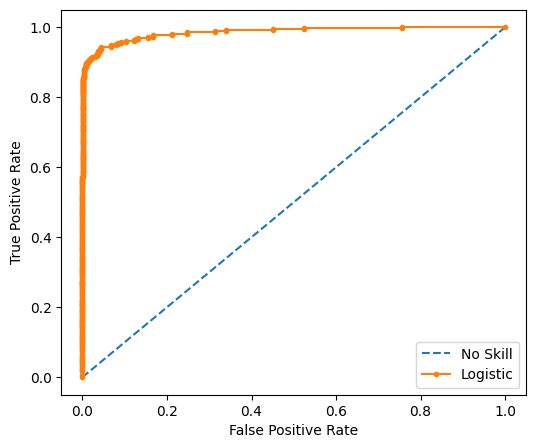

In [ ]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X_resROS, y_resROS, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs', max_iter=500)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Precisão vs Recall

Logistic: f1=0.943 auc=0.988


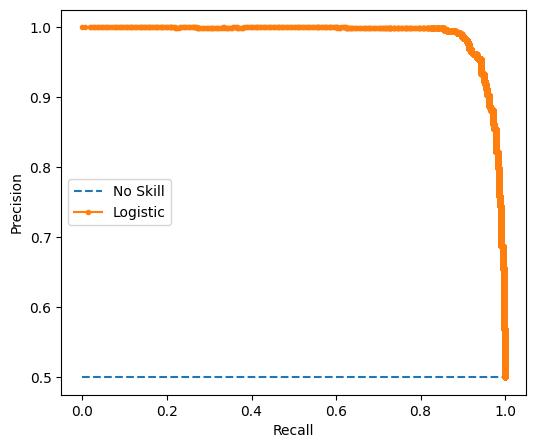

In [ ]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X_resROS, y_resROS, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs', max_iter=500)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()